In [1]:
print("GEd")

GEd


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [776]:
import re
import time

In [640]:
import torch
import torch.nn as nn


In [642]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [274]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [5]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("berkanoztas/synthetic-transaction-monitoring-dataset-aml")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\honer\.cache\kagglehub\datasets\berkanoztas\synthetic-transaction-monitoring-dataset-aml\versions\2


In [323]:
df = pd.read_csv("Data/SAML-D.csv")

In [7]:
df.head()

,Time,Date,Sender_account,Receiver_account,Amount,Payment_currency,Received_currency,Sender_bank_location,Receiver_bank_location,Payment_type,Is_laundering,Laundering_type
0,10:35:19,2022-10-07,8724731955,2769355426,1459.15,UK pounds,UK pounds,UK,UK,Cash Deposit,0,Normal_Cash_Deposits
1,10:35:20,2022-10-07,1491989064,8401255335,6019.64,UK pounds,Dirham,UK,UAE,Cross-border,0,Normal_Fan_Out
2,10:35:20,2022-10-07,287305149,4404767002,14328.44,UK pounds,UK pounds,UK,UK,Cheque,0,Normal_Small_Fan_Out
3,10:35:21,2022-10-07,5376652437,9600420220,11895.00,UK pounds,UK pounds,UK,UK,ACH,0,Normal_Fan_In
4,10:35:21,2022-10-07,9614186178,3803336972,115.25,UK pounds,UK pounds,UK,UK,Cash Deposit,0,Normal_Cash_Deposits


In [8]:
df["Sender_bank_location"].value_counts()

Sender_bank_location
UK             9183088
Turkey           20902
Switzerland      20503
Pakistan         20346
UAE              20081
Nigeria          20027
Spain            19391
Germany          19259
USA              19027
Italy            18895
France           18702
Japan            18468
Morocco          18437
Austria          18050
Mexico           17662
Albania          17648
India            17596
Netherlands      16770
Name: count, dtype: int64

In [9]:
df["Date"].value_counts()

Date
2023-02-09    36645
2023-02-01    35910
2023-02-06    35038
2023-02-22    34566
2022-12-23    34156
              ...  
2022-12-31    25808
2022-10-30    25298
2022-10-23    23719
2022-10-07    20892
2023-08-23     8400
Name: count, Length: 321, dtype: int64

In [325]:
df = df.drop("Sender_account", axis=1)

In [327]:
df = df.drop("Receiver_account", axis=1)

In [12]:
df["Is_laundering"].value_counts()

Is_laundering
0    9494979
1       9873
Name: count, dtype: int64

In [13]:
df.head()

,Time,Date,Amount,Payment_currency,Received_currency,Sender_bank_location,Receiver_bank_location,Payment_type,Is_laundering,Laundering_type
0,10:35:19,2022-10-07,1459.15,UK pounds,UK pounds,UK,UK,Cash Deposit,0,Normal_Cash_Deposits
1,10:35:20,2022-10-07,6019.64,UK pounds,Dirham,UK,UAE,Cross-border,0,Normal_Fan_Out
2,10:35:20,2022-10-07,14328.44,UK pounds,UK pounds,UK,UK,Cheque,0,Normal_Small_Fan_Out
3,10:35:21,2022-10-07,11895.00,UK pounds,UK pounds,UK,UK,ACH,0,Normal_Fan_In
4,10:35:21,2022-10-07,115.25,UK pounds,UK pounds,UK,UK,Cash Deposit,0,Normal_Cash_Deposits


In [15]:
#sns.barplot(data=df, x="Date", y="Is_laundering")

In [16]:
df["Is_laundering"].value_counts()

Is_laundering
0    9494979
1       9873
Name: count, dtype: int64

In [329]:
df = df.sample(frac = 1)

In [330]:
non_laundering_indices = df[df["Is_laundering"] == 0].index
drop_indices = np.random.choice(non_laundering_indices, size=int(0.9 * len(non_laundering_indices)), replace=False)
df = df.drop(drop_indices)
print(df["Is_laundering"].value_counts(normalize=True))


Is_laundering
0    0.989709
1    0.010291
Name: proportion, dtype: float64


In [19]:
df["Is_laundering"].value_counts()

Is_laundering
0    949498
1      9873
Name: count, dtype: int64

In [331]:
def datetime_to_month(date):
    match = re.search("^([0-9]+)-([0-9]+)-([0-9]+)$", date)
    if len(match.group(2)) == 2:
        return int(match.group(2))

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 959371 entries, 8941336 to 8410502
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Time                    959371 non-null  object 
 1   Date                    959371 non-null  object 
 2   Amount                  959371 non-null  float64
 3   Payment_currency        959371 non-null  object 
 4   Received_currency       959371 non-null  object 
 5   Sender_bank_location    959371 non-null  object 
 6   Receiver_bank_location  959371 non-null  object 
 7   Payment_type            959371 non-null  object 
 8   Is_laundering           959371 non-null  int64  
 9   Laundering_type         959371 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 80.5+ MB


In [333]:
df["Month"] = df["Date"].apply(datetime_to_month)

In [23]:
df.head(5)

,Time,Date,Amount,Payment_currency,Received_currency,Sender_bank_location,Receiver_bank_location,Payment_type,Is_laundering,Laundering_type,Month
8941336,09:46:43,2023-08-04,6270.98,UK pounds,UK pounds,UK,UK,Credit card,0,Normal_Fan_In,8
9043652,17:35:32,2023-08-07,898.47,UK pounds,UK pounds,UK,UK,Credit card,0,Normal_Small_Fan_Out,8
601284,09:03:02,2022-10-28,8097.70,UK pounds,UK pounds,UK,UK,ACH,0,Normal_Fan_In,10
3760794,16:52:02,2023-02-11,1248.39,UK pounds,UK pounds,UK,UK,Credit card,0,Normal_Small_Fan_Out,2
5635478,14:55:42,2023-04-14,4754.27,UK pounds,UK pounds,UK,UK,Credit card,0,Normal_Fan_Out,4


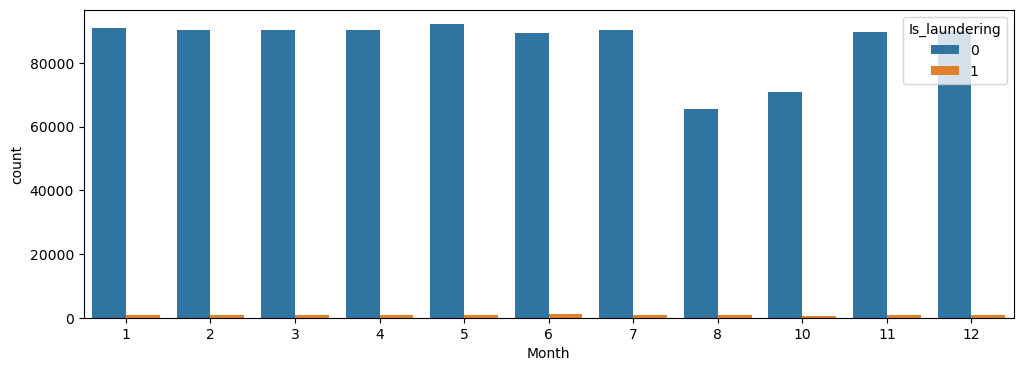

In [24]:
plt.figure(figsize=(12,4))
sns.countplot(data=df, x="Month", hue="Is_laundering")
plt.show()

In [336]:
for m in df["Month"].unique():
    proportion = (len(df[(df["Month"] == m) & (df["Is_laundering"] == 1)]))/len(df[df["Month"] == m])
    print("proportion: ", proportion)

proportion:  0.008813604475623835
proportion:  0.010096719383087179
proportion:  0.009364996972056406
proportion:  0.012407504297780102
proportion:  0.010785959599284594
proportion:  0.010593896946270663
proportion:  0.010382939491389624
proportion:  0.011256705654735731
proportion:  0.009974157365150931
proportion:  0.01026694045174538
proportion:  0.009694091353540997


In [100]:
#need to actually have this when i do the graph below

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 959371 entries, 8941336 to 8410502
Data columns (total 11 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Time                    959371 non-null  object 
 1   Date                    959371 non-null  object 
 2   Amount                  959371 non-null  float64
 3   Payment_currency        959371 non-null  object 
 4   Received_currency       959371 non-null  object 
 5   Sender_bank_location    959371 non-null  object 
 6   Receiver_bank_location  959371 non-null  object 
 7   Payment_type            959371 non-null  object 
 8   Is_laundering           959371 non-null  int64  
 9   Laundering_type         959371 non-null  object 
 10  Month                   959371 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 87.8+ MB


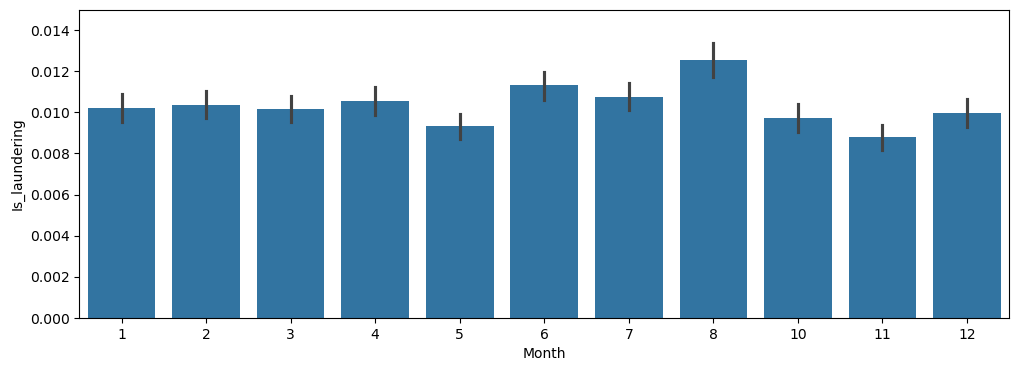

In [106]:
plt.figure(figsize=(12,4))
sns.barplot(data=df, y="Is_laundering", x="Month")
plt.ylim(0, 0.015)
plt.show()

In [112]:
df["Receiver_bank_location"].value_counts()

Receiver_bank_location
UK             893409
Morocco          4113
Albania          4092
Nigeria          4082
Austria          4038
Mexico           3987
Pakistan         3972
Japan            3954
France           3938
Germany          3916
Netherlands      3850
India            3824
USA              3767
Spain            3723
Italy            3710
Turkey           3692
Switzerland      3685
UAE              3619
Name: count, dtype: int64

In [339]:
for receive_loc in df["Receiver_bank_location"].unique():
    proportion = (len(df[(df["Receiver_bank_location"] == receive_loc) & (df["Is_laundering"] == 1)]))/len(df[df["Receiver_bank_location"] == receive_loc])
    print(f"proportion when receiver location is {receive_loc}: {(proportion*100):.2f}%") 

proportion when receiver location is UK: 0.82%
proportion when receiver location is Turkey: 4.78%
proportion when receiver location is Mexico: 4.85%
proportion when receiver location is Spain: 2.31%
proportion when receiver location is Pakistan: 4.17%
proportion when receiver location is Italy: 3.45%
proportion when receiver location is Japan: 2.14%
proportion when receiver location is Netherlands: 3.82%
proportion when receiver location is Albania: 5.63%
proportion when receiver location is Austria: 3.90%
proportion when receiver location is France: 2.05%
proportion when receiver location is Germany: 2.61%
proportion when receiver location is USA: 2.30%
proportion when receiver location is Morocco: 6.16%
proportion when receiver location is Nigeria: 6.30%
proportion when receiver location is India: 3.61%
proportion when receiver location is UAE: 5.25%
proportion when receiver location is Switzerland: 2.12%


In [123]:
df["Sender_bank_location"].value_counts()

Sender_bank_location
UK             926676
Turkey           2164
Pakistan         2052
UAE              2022
Nigeria          2004
Switzerland      1984
Italy            1957
Spain            1955
USA              1935
Germany          1916
India            1914
France           1891
Morocco          1867
Mexico           1855
Japan            1812
Austria          1809
Netherlands      1795
Albania          1763
Name: count, dtype: int64

In [341]:
for send_loc in df["Sender_bank_location"].unique():
    proportion = (len(df[(df["Sender_bank_location"] == send_loc) & (df["Is_laundering"] == 1)]))/len(df[df["Sender_bank_location"] == send_loc])
    print(f"proportion when sender location is {send_loc}: {(proportion*100):.2f}%") 

proportion when sender location is UK: 1.00%
proportion when sender location is India: 2.27%
proportion when sender location is Netherlands: 2.40%
proportion when sender location is Pakistan: 1.19%
proportion when sender location is Morocco: 2.81%
proportion when sender location is UAE: 1.62%
proportion when sender location is Turkey: 1.33%
proportion when sender location is Nigeria: 1.24%
proportion when sender location is USA: 1.83%
proportion when sender location is Italy: 2.34%
proportion when sender location is Mexico: 2.46%
proportion when sender location is France: 1.59%
proportion when sender location is Spain: 1.38%
proportion when sender location is Austria: 2.06%
proportion when sender location is Albania: 1.54%
proportion when sender location is Switzerland: 2.04%
proportion when sender location is Japan: 2.05%
proportion when sender location is Germany: 2.23%


In [129]:
df.columns

Index(['Time', 'Date', 'Amount', 'Payment_currency', 'Received_currency',
       'Sender_bank_location', 'Receiver_bank_location', 'Payment_type',
       'Is_laundering', 'Laundering_type', 'Month'],
      dtype='object')

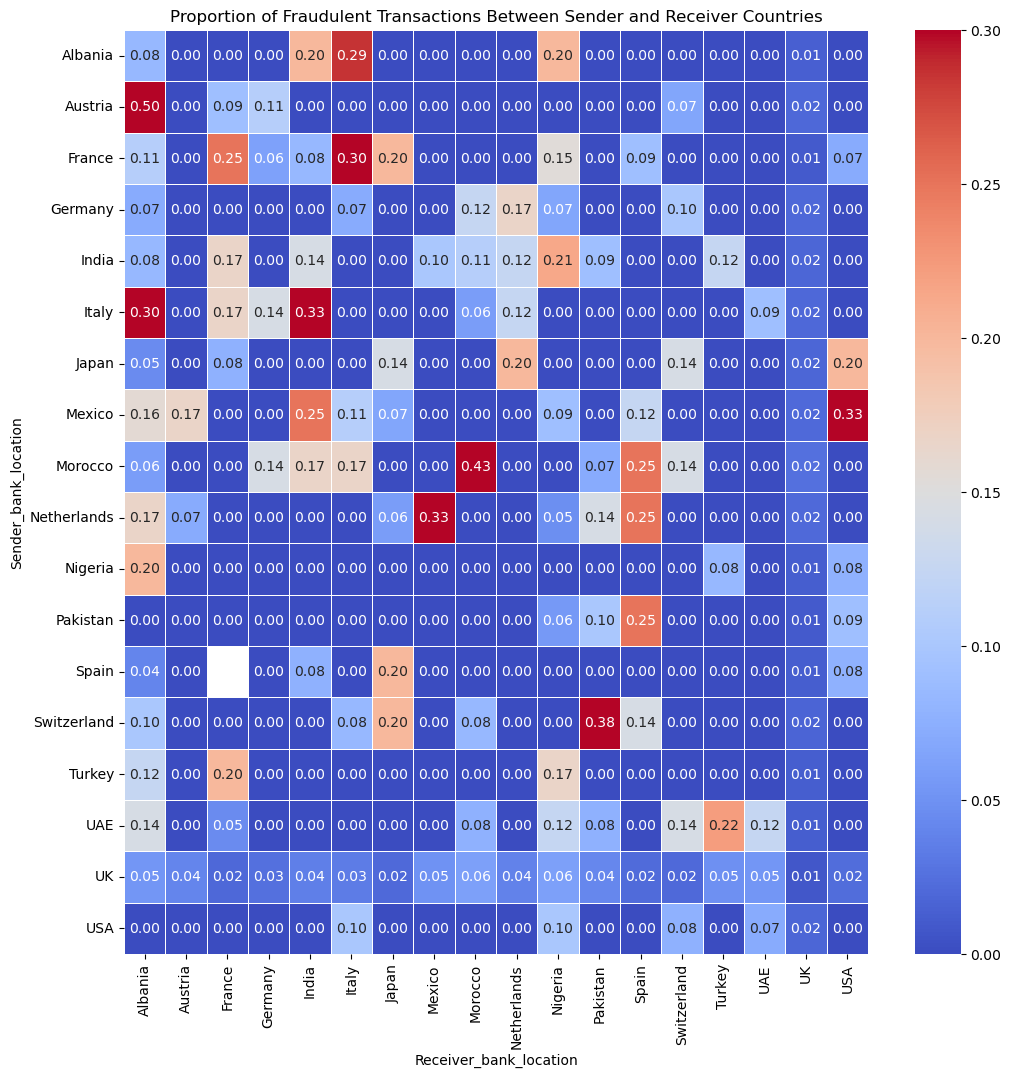

In [343]:

pivot_table = df.pivot_table(
    index='Sender_bank_location', 
    columns='Receiver_bank_location', 
    values='Is_laundering', 
    aggfunc='mean'
)

plt.figure(figsize=(12, 12))
sns.heatmap(pivot_table, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, vmin=0, vmax=0.3)

plt.title('Proportion of Fraudulent Transactions Between Sender and Receiver Countries')
plt.show()


In [345]:
df.columns

Index(['Time', 'Date', 'Amount', 'Payment_currency', 'Received_currency',
       'Sender_bank_location', 'Receiver_bank_location', 'Payment_type',
       'Is_laundering', 'Laundering_type', 'Month'],
      dtype='object')

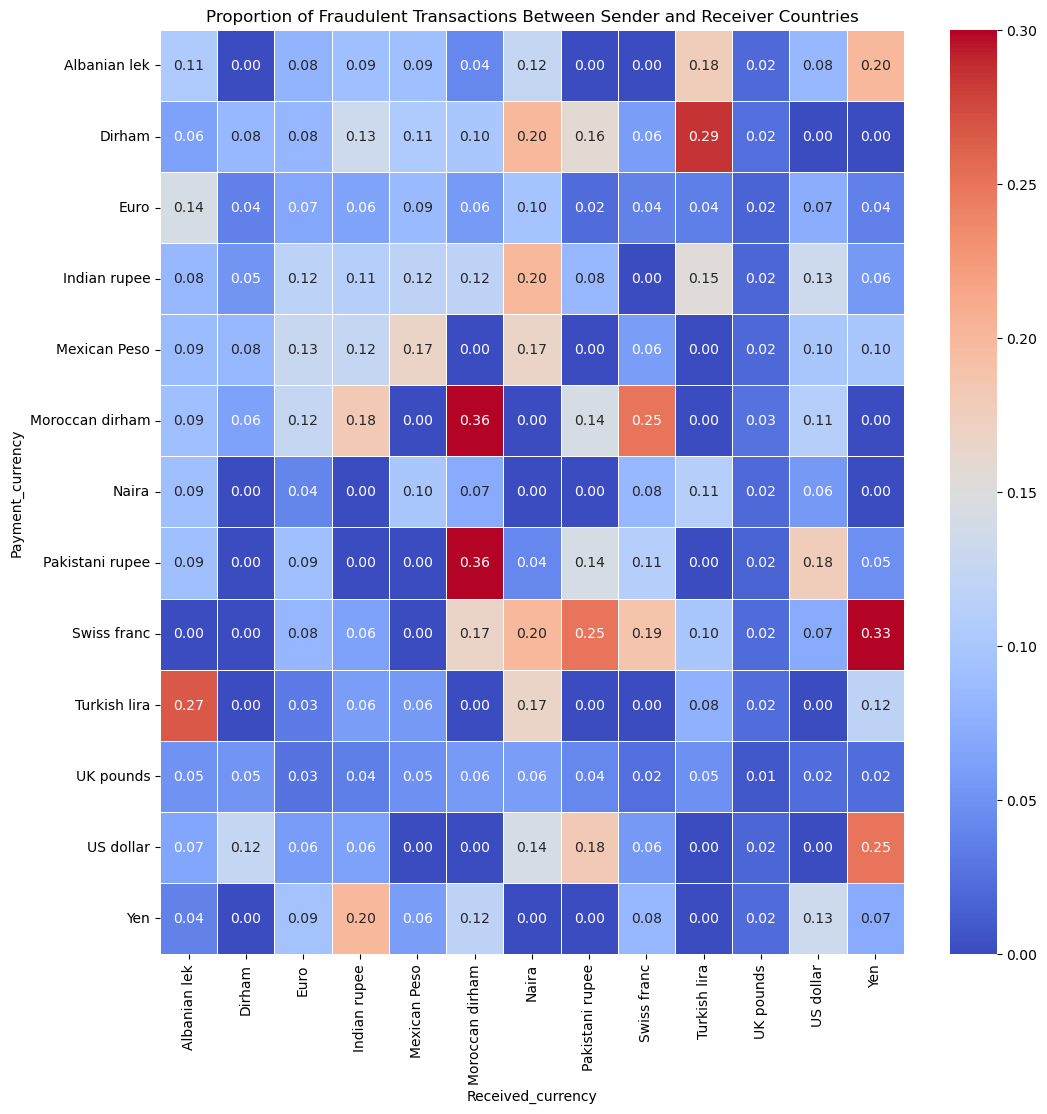

In [347]:
pivot_table = df.pivot_table(
    index='Payment_currency', 
    columns='Received_currency', 
    values='Is_laundering', 
    aggfunc='mean'
)

plt.figure(figsize=(12, 12))
sns.heatmap(pivot_table, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, vmin=0, vmax=0.3)

plt.title('Proportion of Fraudulent Transactions Between Sender and Receiver Countries')
plt.show()


In [181]:
df["Payment_type"].value_counts()

Payment_type
Credit card        202783
Debit card         202320
ACH                202138
Cheque             201773
Cross-border        95419
Cash Withdrawal     31220
Cash Deposit        23718
Name: count, dtype: int64

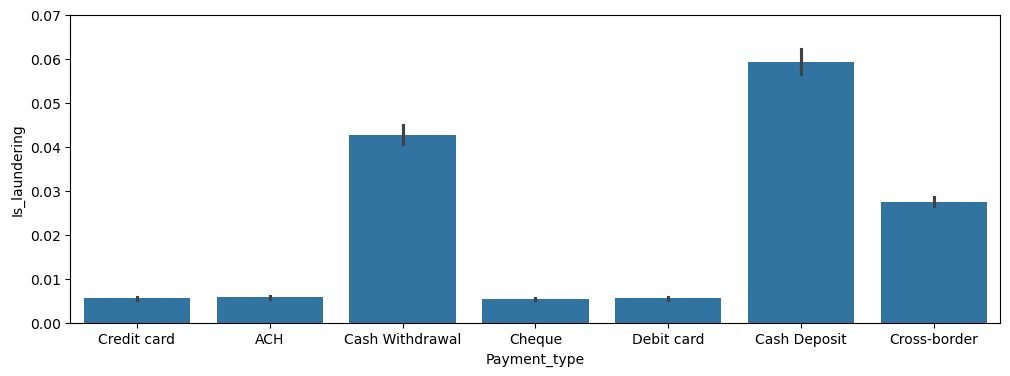

In [189]:
plt.figure(figsize=(12,4))
sns.barplot(data=df, y="Is_laundering", x="Payment_type")
plt.ylim(0, 0.07)
plt.show()

In [191]:
df["Time"]

8941336    09:46:43
9043652    17:35:32
601284     09:03:02
3760794    16:52:02
5635478    14:55:42
             ...   
8924416    17:24:22
620324     20:40:40
5616270    21:53:02
4208635    15:07:03
8410502    18:45:28
Name: Time, Length: 959371, dtype: object

In [349]:
def time_to_hour(time):
    matches = re.search("^([0-9][0-9]):.*$", time)
    return int(matches.group(1))

In [351]:
df["Hour"] = df["Time"].apply(time_to_hour)

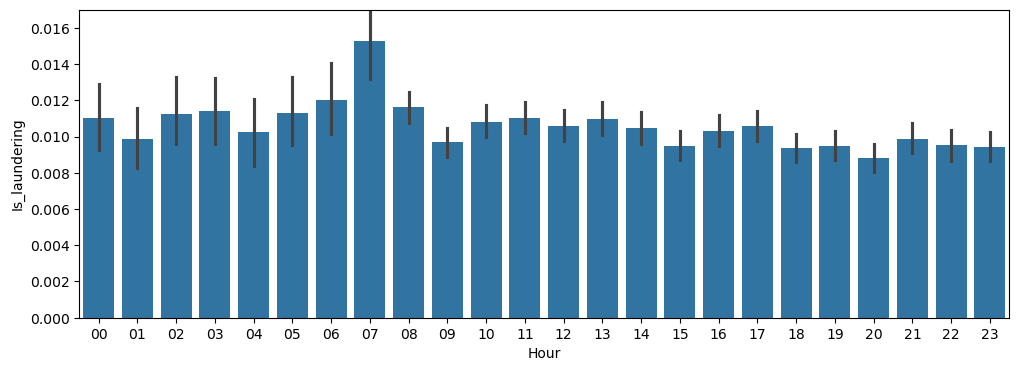

In [215]:
plt.figure(figsize=(12,4))
sns.barplot(data=df, y="Is_laundering", x="Hour", order=sorted(df["Hour"].unique()))
plt.ylim(0, 0.017)
plt.show()

In [224]:
df.columns

Index(['Time', 'Date', 'Amount', 'Payment_currency', 'Received_currency',
       'Sender_bank_location', 'Receiver_bank_location', 'Payment_type',
       'Is_laundering', 'Laundering_type', 'Month', 'Hour'],
      dtype='object')

In [353]:
df = df.drop(["Time", "Date", "Month"], axis=1)

In [355]:
df.head(10)

,Amount,Payment_currency,Received_currency,Sender_bank_location,Receiver_bank_location,Payment_type,Is_laundering,Laundering_type,Hour
1173981,2898.26,UK pounds,UK pounds,UK,UK,Cheque,0,Normal_Small_Fan_Out,11
1524812,27350.56,UK pounds,Pakistani rupee,UK,UK,Credit card,0,Normal_Fan_In,10
4993063,3865.76,UK pounds,UK pounds,UK,UK,Credit card,0,Normal_Small_Fan_Out,23
6737068,2641.37,UK pounds,UK pounds,UK,UK,Debit card,0,Normal_Group,17
6762836,12785.72,Indian rupee,UK pounds,India,UK,Cross-border,0,Normal_Fan_In,15
9323375,4611.84,UK pounds,UK pounds,UK,UK,Credit card,0,Normal_Fan_In,4
8753104,2292.90,UK pounds,UK pounds,UK,UK,Cash Deposit,0,Normal_Cash_Deposits,17
1176463,3066.91,UK pounds,UK pounds,UK,UK,Cheque,0,Normal_Small_Fan_Out,13
8167094,5825.66,UK pounds,UK pounds,UK,UK,Credit card,0,Normal_Fan_Out,16
5954037,6179.79,UK pounds,UK pounds,UK,UK,Credit card,0,Normal_Fan_Out,11


C:\Users\honer\AppData\Local\Temp\ipykernel_34620\2432185715.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_stats = df.groupby("amount_bin")["Is_laundering"].mean().reset_index()


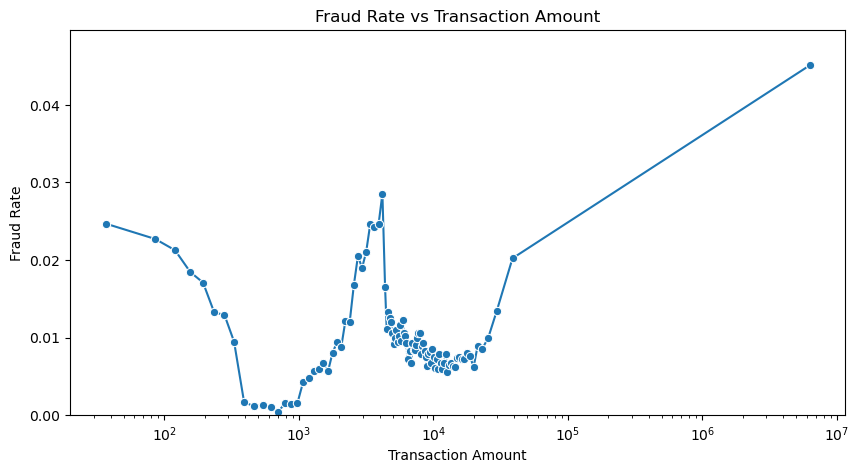

In [357]:

df["amount_bin"] = pd.qcut(df["Amount"], q=100)  
bin_stats = df.groupby("amount_bin")["Is_laundering"].mean().reset_index()

bin_stats["amount_mid"] = bin_stats["amount_bin"].apply(lambda x: x.mid)

plt.figure(figsize=(10, 5))
sns.lineplot(data=bin_stats, x="amount_mid", y="Is_laundering", marker="o")

plt.xlabel("Transaction Amount")
plt.ylabel("Fraud Rate")
plt.title("Fraud Rate vs Transaction Amount")
plt.xscale("log")
plt.ylim(0, bin_stats["Is_laundering"].max() * 1.1) 
plt.show()


In [389]:
df = pd.get_dummies(data=df, columns=['Payment_currency', 'Received_currency', 'Sender_bank_location', 'Receiver_bank_location', 'Payment_type'], drop_first=True)

KeyError: "None of [Index(['Payment_currency', 'Received_currency', 'Sender_bank_location',\n       'Receiver_bank_location', 'Payment_type'],\n      dtype='object')] are in the [columns]"

In [417]:
df = df.applymap(lambda x: int(x) if isinstance(x, bool) else x)


C:\Users\honer\AppData\Local\Temp\ipykernel_34620\2261015548.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: int(x) if isinstance(x, bool) else x)


In [439]:
df = df.drop("amount_bin", axis=1)

In [425]:
y = df["Is_laundering"]
y_type = df["Laundering_type"]

In [427]:
X = df.drop(["Is_laundering", "Laundering_type"], axis=1)

In [504]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=111)

In [506]:
to_drop = y_train[y_train == 0].index
drop_indices = np.random.choice(to_drop, size=int(0.8 * len(to_drop)), replace=False)
X_train = X_train.drop(drop_indices)
y_train = y_train.drop(drop_indices)
print(y_train.value_counts(normalize=True))

Is_laundering
0    0.950436
1    0.049564
Name: proportion, dtype: float64


In [508]:
log_model = LogisticRegression()

In [524]:
param_grid = {"penalty": ["l1", "l2"], "C": np.logspace(0, 3, 8)}

In [526]:
grid_log_model = GridSearchCV(log_model, param_grid=param_grid, verbose=2)

In [528]:
scaler = StandardScaler()

In [530]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [532]:
grid_log_model.fit(scaled_X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END ..................................C=1.0, penalty=l1; total time=   0.0s
[CV] END ..................................C=1.0, penalty=l1; total time=   0.0s
[CV] END ..................................C=1.0, penalty=l1; total time=   0.0s
[CV] END ..................................C=1.0, penalty=l1; total time=   0.0s
[CV] END ..................................C=1.0, penalty=l1; total time=   0.0s
[CV] END ..................................C=1.0, penalty=l2; total time=   0.7s
[CV] END ..................................C=1.0, penalty=l2; total time=   0.6s
[CV] END ..................................C=1.0, penalty=l2; total time=   0.6s
[CV] END ..................................C=1.0, penalty=l2; total time=   0.5s
[CV] END ..................................C=1.0, penalty=l2; total time=   0.5s
[CV] END ...................C=2.6826957952797255, penalty=l1; total time=   0.0s
[CV] END ...................C=2.6826957952797255

C:\Users\honer\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
40 fits failed out of a total of 80.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\honer\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\honer\anaconda3\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\honer\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1172, in fit
    solver = _

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': array([   1.        ,    2.6826958 ,    7.19685673,   19.30697729,
         51.79474679,  138.94954944,  372.75937203, 1000.        ]),
                         'penalty': ['l1', 'l2']},
             verbose=2)

In [534]:
grid_log_model.best_params_

{'C': 1.0, 'penalty': 'l2'}

In [536]:
y_pred = grid_log_model.predict(scaled_X_test)

In [538]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [540]:
accuracy_score(y_test,y_pred)

0.9887634827783175

In [542]:
confusion_matrix(y_test,y_pred)

array([[237005,    392],
       [  2303,    143]], dtype=int64)

In [544]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99    237397
           1       0.27      0.06      0.10      2446

    accuracy                           0.99    239843
   macro avg       0.63      0.53      0.55    239843
weighted avg       0.98      0.99      0.99    239843



In [546]:
y_train.sum()

7427

In [548]:
len(y_train)

149848

In [550]:
y_pred.sum()

535

In [560]:
knn_model = KNeighborsClassifier()
grid_knn_model = GridSearchCV(knn_model, verbose=2, param_grid={"n_neighbors": [2, 3, 5, 8, 11]})

In [562]:
grid_knn_model.fit(scaled_X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END ......................................n_neighbors=2; total time=   6.8s
[CV] END ......................................n_neighbors=2; total time=   6.2s
[CV] END ......................................n_neighbors=2; total time=   6.2s
[CV] END ......................................n_neighbors=2; total time=   6.2s
[CV] END ......................................n_neighbors=2; total time=   6.3s
[CV] END ......................................n_neighbors=3; total time=   6.8s
[CV] END ......................................n_neighbors=3; total time=   6.7s
[CV] END ......................................n_neighbors=3; total time=   6.5s
[CV] END ......................................n_neighbors=3; total time=   6.3s
[CV] END ......................................n_neighbors=3; total time=   6.0s
[CV] END ......................................n_neighbors=5; total time=   6.2s
[CV] END ......................................n_

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [2, 3, 5, 8, 11]}, verbose=2)

In [574]:
y_pred = grid_knn_model.predict(scaled_X_test)

In [575]:
confusion_matrix(y_test,y_pred)

array([[237103,    294],
       [  2234,    212]], dtype=int64)

In [578]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99    237397
           1       0.42      0.09      0.14      2446

    accuracy                           0.99    239843
   macro avg       0.70      0.54      0.57    239843
weighted avg       0.98      0.99      0.99    239843



In [598]:
svm = SVC()
param_grid = {'C':[0.01,0.1,1],'kernel':['rbf','poly']}
grid_svm_model = GridSearchCV(svm,param_grid, verbose=2)

In [600]:
grid_svm_model.fit(scaled_X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END ..............................C=0.01, kernel=linear; total time= 8.1min


KeyboardInterrupt: 

In [602]:
grid_svm_model.best_params_

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [ ]:
y_pred = grid_svm_model.predict(scaled_X_test)

In [ ]:
accuracy_score(y_test,y_pred)

In [ ]:
confusion_matrix(y_test,y_pred)

In [ ]:
print(classification_report(y_test,y_pred))

In [604]:
n_estimators=[64,100,128,200]
max_features= [2,3,4]
bootstrap = [True,False]
oob_score = [True,False]
param_grid = {'n_estimators':n_estimators,
             'max_features':max_features,
             'bootstrap':bootstrap,
             'oob_score':oob_score}

In [614]:
rfc = RandomForestClassifier()

In [618]:
grid_rfc_model = GridSearchCV(rfc, param_grid=param_grid, verbose=2)

In [622]:
grid_rfc_model.fit(scaled_X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END bootstrap=True, max_features=2, n_estimators=64, oob_score=True; total time=  16.9s
[CV] END bootstrap=True, max_features=2, n_estimators=64, oob_score=True; total time=  17.3s
[CV] END bootstrap=True, max_features=2, n_estimators=64, oob_score=True; total time=  17.3s
[CV] END bootstrap=True, max_features=2, n_estimators=64, oob_score=True; total time=  16.6s
[CV] END bootstrap=True, max_features=2, n_estimators=64, oob_score=True; total time=  17.1s
[CV] END bootstrap=True, max_features=2, n_estimators=64, oob_score=False; total time=  15.7s
[CV] END bootstrap=True, max_features=2, n_estimators=64, oob_score=False; total time=  15.3s
[CV] END bootstrap=True, max_features=2, n_estimators=64, oob_score=False; total time=  15.7s
[CV] END bootstrap=True, max_features=2, n_estimators=64, oob_score=False; total time=  15.7s
[CV] END bootstrap=True, max_features=2, n_estimators=64, oob_score=False; total time=  16.0s
[CV

C:\Users\honer\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
60 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\honer\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\honer\anaconda3\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\honer\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    raise ValueError

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False], 'max_features': [2, 3, 4],
                         'n_estimators': [64, 100, 128, 200],
                         'oob_score': [True, False]},
             verbose=2)

In [626]:
y_pred = grid_rfc_model.predict(scaled_X_test)

In [628]:
accuracy_score(y_test,y_pred)

0.9612913447546937

In [630]:
confusion_matrix(y_test,y_pred)

array([[230115,   7282],
       [  2002,    444]], dtype=int64)

In [632]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98    237397
           1       0.06      0.18      0.09      2446

    accuracy                           0.96    239843
   macro avg       0.52      0.58      0.53    239843
weighted avg       0.98      0.96      0.97    239843



In [624]:
grid_rfc_model.best_params_

{'bootstrap': True, 'max_features': 4, 'n_estimators': 64, 'oob_score': True}

In [634]:
param_grid = {"n_estimators":[1,10,40,100],'max_depth':[3,4,5, 6]}

In [644]:
gb_model = GradientBoostingClassifier()

In [646]:
grid_gb_model = GridSearchCV(gb_model,param_grid, verbose=2)

In [648]:
grid_gb_model.fit(scaled_X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END ........................max_depth=3, n_estimators=1; total time=   0.3s
[CV] END ........................max_depth=3, n_estimators=1; total time=   0.3s
[CV] END ........................max_depth=3, n_estimators=1; total time=   0.3s
[CV] END ........................max_depth=3, n_estimators=1; total time=   0.3s
[CV] END ........................max_depth=3, n_estimators=1; total time=   0.3s
[CV] END .......................max_depth=3, n_estimators=10; total time=   3.0s
[CV] END .......................max_depth=3, n_estimators=10; total time=   2.9s
[CV] END .......................max_depth=3, n_estimators=10; total time=   2.9s
[CV] END .......................max_depth=3, n_estimators=10; total time=   2.9s
[CV] END .......................max_depth=3, n_estimators=10; total time=   3.0s
[CV] END .......................max_depth=3, n_estimators=40; total time=  12.2s
[CV] END .......................max_depth=3, n_e

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'max_depth': [3, 4, 5, 6],
                         'n_estimators': [1, 10, 40, 100]},
             verbose=2)

In [652]:
y_pred = grid_gb_model.predict(scaled_X_test)

In [654]:
accuracy_score(y_test,y_pred)

0.9904562568013242

In [656]:
confusion_matrix(y_test,y_pred)

array([[237333,     64],
       [  2225,    221]], dtype=int64)

In [658]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00    237397
           1       0.78      0.09      0.16      2446

    accuracy                           0.99    239843
   macro avg       0.88      0.55      0.58    239843
weighted avg       0.99      0.99      0.99    239843



In [650]:
grid_gb_model.best_params_

{'max_depth': 4, 'n_estimators': 40}

In [669]:
df = pd.read_csv("Data/SAML-D.csv")
df = df.drop("Sender_account", axis=1)
df = df.drop("Receiver_account", axis=1)
non_laundering_indices = df[df["Is_laundering"] == 0].index
drop_indices = np.random.choice(non_laundering_indices, size=int(0.9 * len(non_laundering_indices)), replace=False)
df = df.drop(drop_indices)
print(df["Is_laundering"].value_counts(normalize=True))
df["Hour"] = df["Time"].apply(time_to_hour)
df = df.drop(["Time", "Date"], axis=1)

Is_laundering
0    0.989709
1    0.010291
Name: proportion, dtype: float64


In [679]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 959371 entries, 2 to 9504850
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Amount                  959371 non-null  float64
 1   Payment_currency        959371 non-null  object 
 2   Received_currency       959371 non-null  object 
 3   Sender_bank_location    959371 non-null  object 
 4   Receiver_bank_location  959371 non-null  object 
 5   Payment_type            959371 non-null  object 
 6   Is_laundering           959371 non-null  int64  
 7   Laundering_type         959371 non-null  object 
 8   Hour                    959371 non-null  int64  
dtypes: float64(1), int64(2), object(6)
memory usage: 73.2+ MB


In [681]:
cat_cols = ["Payment_currency", "Received_currency", "Sender_bank_location", "Receiver_bank_location", "Payment_type"]
cont_cols = ["Amount", "Hour"]
y_col = ["Is_laundering"]

In [683]:
for cat in cat_cols:
    df[cat] = df[cat].astype('category')

In [689]:
cats = np.stack([df[col].cat.codes.values for col in cat_cols], 1)

In [693]:
cats = torch.tensor(cats, dtype=torch.int64)

In [695]:
cats

tensor([[10, 10, 16, 16,  3],
        [10, 10, 16, 16,  1],
        [10,  7, 16, 16,  4],
        ...,
        [10, 10, 16, 16,  4],
        [10, 10, 16, 16,  0],
        [10, 10, 16, 16,  0]])

In [707]:
conts = np.stack([df[col].values for col in cont_cols], 1)
conts = torch.tensor(conts, dtype=torch.float)


In [709]:
conts.type()

'torch.FloatTensor'

In [715]:
y = torch.tensor(df[y_col].values).flatten()


In [721]:
y.shape

torch.Size([959371])

In [723]:
cat_szs = [len(df[col].cat.categories) for col in cat_cols]
emb_szs = [(size, min(50, (size+1)//2)) for size in cat_szs]
emb_szs

[(13, 7), (13, 7), (18, 9), (18, 9), (7, 4)]

In [1053]:
class TabularModel(nn.Module):

    def __init__(self, emb_szs, n_cont, out_sz=2, layers=[120, 84], p=0.5):
        super().__init__()
        self.embeds = nn.ModuleList([nn.Embedding(ni, nf) for ni,nf in emb_szs])
        self.emb_drop = nn.Dropout(p)
        self.bn_cont = nn.BatchNorm1d(n_cont)
        
        layerlist = []
        n_emb = sum((nf for ni,nf in emb_szs))
        n_in = n_emb + n_cont
        
        for i in layers:
            layerlist.append(nn.Linear(n_in,i)) 
            layerlist.append(nn.LeakyReLU(negative_slope=0.02, inplace=True))
            layerlist.append(nn.BatchNorm1d(i))
            layerlist.append(nn.Dropout(p))
            n_in = i
        layerlist.append(nn.Linear(layers[-1],out_sz))
            
        self.layers = nn.Sequential(*layerlist)
    
    def forward(self, x_cat, x_cont):
        embeddings = []
        for i,e in enumerate(self.embeds):
            embeddings.append(e(x_cat[:,i]))
        x = torch.cat(embeddings, 1)
        x = self.emb_drop(x)
        
        x_cont = self.bn_cont(x_cont)
        x = torch.cat([x, x_cont], 1)
        x = self.layers(x)
        return x

""" ---Credit to Pierian Data Inc. for network structure """

' ---Credit to Pierian Data Inc. for network structure '

In [803]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 959371 entries, 2 to 9504850
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype   
---  ------                  --------------   -----   
 0   Amount                  959371 non-null  float64 
 1   Payment_currency        959371 non-null  category
 2   Received_currency       959371 non-null  category
 3   Sender_bank_location    959371 non-null  category
 4   Receiver_bank_location  959371 non-null  category
 5   Payment_type            959371 non-null  category
 6   Is_laundering           959371 non-null  int64   
 7   Laundering_type         959371 non-null  object  
 8   Hour                    959371 non-null  int64   
dtypes: category(5), float64(1), int64(2), object(1)
memory usage: 41.2+ MB


In [1286]:
model = TabularModel(emb_szs, conts.shape[1], 2, [120, 84], p=0.4)

In [1288]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.005)

In [1338]:
test_size=100000
batch_size = 700000

cat_train = cats[:batch_size-test_size]
cat_test = cats[batch_size-test_size:batch_size]
con_train = conts[:batch_size-test_size]
con_test = conts[batch_size-test_size:batch_size]
y_train = y[:batch_size-test_size]
y_test = y[batch_size-test_size:batch_size]

In [1294]:
zero_indices = torch.where(y_train == 0)[0] 
one_indices = torch.where(y_train == 1)[0]   

num_zeros_to_keep = int(len(zero_indices) * 0.1)
selected_zero_indices = zero_indices[torch.randperm(len(zero_indices))[:num_zeros_to_keep]]

final_indices = torch.cat([selected_zero_indices, one_indices])

final_indices = final_indices[torch.randperm(len(final_indices))]

cat_train = cat_train[final_indices]
con_train = con_train[final_indices]
y_train = y_train[final_indices]

In [1296]:
start_time = time.time()

epochs = 100
losses = []

for i in range(epochs):
    i+=1
    y_pred = model(cat_train, con_train)
    loss = criterion(y_pred, y_train)
    losses.append(loss)
    
    if i%25 == 1:
        print(f'epoch: {i:3}  loss: {loss.item():10.8f}')

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

print(f'epoch: {i:3}  loss: {loss.item():10.8f}') 
print(f'\nDuration: {time.time() - start_time:.0f} seconds') 

epoch:   1  loss: 0.89810586
epoch:  26  loss: 0.37200826
epoch:  51  loss: 0.28941318
epoch:  76  loss: 0.27695778
epoch: 100  loss: 0.27213928

Duration: 21 seconds


In [1298]:
with torch.no_grad():
    y_val = model(cat_test, con_test)
    loss = criterion(y_val, y_test)
print(f'CE Loss: {loss:.8f}')

CE Loss: 0.13929181


In [1300]:
(torch.argmax(y_val, dim=1) == y_test).sum() / test_size

tensor(0.9772)

In [1302]:
(torch.argmax(y_val, dim=1)).sum()

tensor(1579)

In [1304]:
y_test.sum()

tensor(904)

In [1306]:
confusion_matrix(y_test, (torch.argmax(y_val, dim=1)))

array([[97617,  1479],
       [  804,   100]], dtype=int64)

In [1308]:
indices = torch.where(y_test == 1)[0]
y_pred_for_class_1 = y_val[indices]

In [1340]:
((y_pred_for_class_1).diff(dim=1) > -1.5).sum() 

tensor(463)

In [1342]:
torch.sum(y_val.diff(dim=1) > -1.5).item()

13364

In [933]:
len(y_val)

100000

In [939]:
y_val[:30]

tensor([[ 1.3129, -1.5019],
        [ 1.3320, -1.3327],
        [ 2.5576, -1.2904],
        [ 0.9072, -1.1709],
        [ 1.4072, -1.4152],
        [ 1.1640, -1.0268],
        [ 1.7148, -1.6628],
        [ 0.3971, -1.1367],
        [ 1.9630, -1.0164],
        [ 1.9861, -1.2969],
        [ 1.5834, -1.4899],
        [ 1.1364, -1.3841],
        [ 1.7501, -1.6827],
        [ 1.5386, -1.3949],
        [ 1.5763, -1.6197],
        [ 1.8076, -1.8088],
        [ 1.3448, -1.1221],
        [ 1.5400, -1.4167],
        [ 1.3855, -1.2781],
        [ 0.5269, -0.5969],
        [ 1.3621, -1.3451],
        [ 2.2496, -1.7946],
        [ 1.2744, -0.6026],
        [ 1.9439, -0.6854],
        [ 1.0242, -1.1654],
        [ 1.2534, -1.2311],
        [ 0.9142, -1.2982],
        [ 1.9364, -1.3716],
        [ 1.4239, -1.1770],
        [ 1.5260, -1.2844]])

In [943]:
torch.sum(y_val[:2].diff(dim=1) > -1).item()

0

In [1172]:
y_pred_for_class_1

tensor([[ 0.6487, -1.0897],
        [ 1.3437, -1.8732],
        [ 1.0881, -1.1397],
        ...,
        [ 0.9504, -1.2756],
        [ 1.7270, -1.8475],
        [ 0.9261, -0.5289]])

In [1188]:
((y_pred_for_class_1[:10]).diff(dim=1) > -1.5).sum()

tensor(3)

In [1194]:
y_pred_for_class_1.shape[0]

904